In [18]:
# import
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [4]:
# load dataset
# load the MNIST dataset, containing 70,000 28x28 images showing handwritten digits.
# load this dataset using Kera
# function returns the dataset split into train and test sets.

# x_train and x_test contain our train and test images.
# y_train and y_test contain the target values: a number between 0 and 9 indicating the digit shown in the corresponding image.
# 60,000 images to train the model and 10,000 to test it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
# print out
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [8]:
# preprocess dataset
# train data
# When dealing with images, we need a tensor with 4 dimensions: batch size, width, height, and color channels.
# x_train/y_train are (60000, 28, 28). Need to reshape it to add the missing dimension ("1" because these images are grayscale.)
x_train = x_train.reshape((-1, 28, 28, 1))
# Each pixel goes from 0 to 255. Neural networks work much better with smaller values.
# Need to normalize pixels by dividing them by 255. That way, each pixel will go from 0 to 1.
x_train = x_train.astype('float32') / 255.0
# Target values go from 0 to 9 (the value of each digit.)
# This line one-hot encodes these values.
# For example, this will transform a value 5, in an array of zeros with a single 1 corresponding to the fifth position:
# [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train_one_hot = to_categorical(y_train)

# test data
x_test = x_test.reshape((-1, 28, 28, 1))
x_test = x_test.astype('float32') / 255.0
y_test_one_hot = to_categorical(y_test)

-- train data
(60000, 28, 28, 1)
(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
-- test data
(10000, 28, 28, 1)
(10000,)
(10000, 10)


In [27]:
# print out data
# print out train data
print('-- train data')
print(x_train.shape)
print(y_train.shape)
print(y_train[0])
print(y_train_one_hot.shape)
print(y_train_one_hot[0])

# print out test data
print('-- test data')
print(x_test.shape)
print(y_test.shape)
print(y_test_one_hot.shape)

-- train data
(60000, 28, 28, 1)
(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
-- test data
(10000, 28, 28, 1)
(10000,)
(10000, 10)


In [28]:
# variables
num_classes = 10
input_shape = (28, 28, 1)

# build the model
# a sequence of conv2D/MaxPool blocks plus a Dense layer as a classifier
model = Sequential()

# Input layer
# input shape: a 28x28x1 tensor (width, height, channels)
model.add(Input(shape=input_shape))

# ConvNet Block 1
# Conv2D layer with 32 filters and a 3x3 kernel
# This Conv2D layer will generate 32 different representations using the training images
# Also need to define the activation function used for this layer: ReLU
# Relu will allow us to solve non-linear problems, like recognizing handwritten digits.
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
# After our Conv2D layer, we have a max pooling operation.
# The goal of this layer is to downsample the amount of information collected by the convolutional layer.
# Want to throw away unimportant details and retain what truly matters.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
# We are now going to flatten the output. We want everything in a continuous list of values.
# That's what the Flatten layer does. It will give us a flat tensor.
model.add(Flatten())
# Have a couple of Dense layers that represents the classifier
# Also have the relu activation function
model.add(Dense(units=100, activation='relu'))
# the output layer has a size of 10, one for each of our possible digit values, and a softmax activation.
# The softmax ensures we get a probability distribution indicating the most likely digit in the image.
model.add(Dense(units=num_classes, activation='softmax'))

# show model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               540900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [30]:
# compile the model
# After creating our model, we compile it
# Use Stochastic Gradient Descent (SGD) as the optimizer
# The loss is categorical cross-entropy: this is a multi-class classification problem
# Want to record the accuracy as the model trains
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [31]:
# validation data
x_val = x_test
y_val_one_hot = y_test_one_hot

In [34]:
print(x_val.shape)
print(y_val_one_hot.shape)

(10000, 28, 28, 1)
(10000, 10)


In [33]:
# train the model
# fit the model. This starts training it.
# Use batch size of 32 images
# Run 10 total epochs
# When fit() is done, we have a fully trained model!

# hyper-parameters
batch_size = 32
epochs = 10
# train the model
history = model.fit(x_train, 
                    y_train_one_hot, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(x_val, y_val_one_hot))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3020 - accuracy: 0.1110 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3018 - accuracy: 0.1116 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3020 - accuracy: 0.1119 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3020 - accuracy: 0.1103 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3020 - accuracy: 0.1110 - val_loss: 2.3018 - val_accuracy:

In [15]:
def plot_loss(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    print(epochs)

    # Visualize the loss
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    print(epochs)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

range(1, 11)


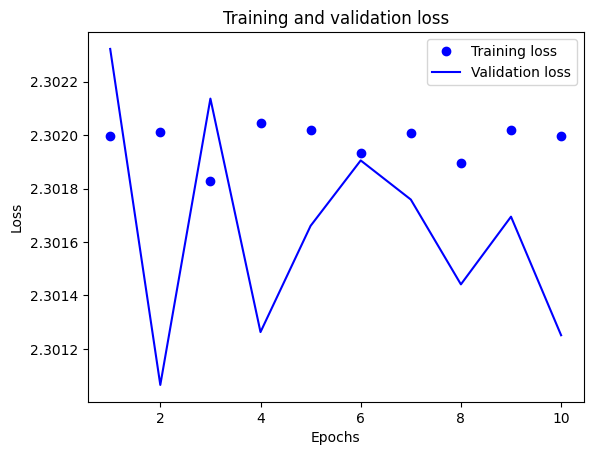

range(1, 11)


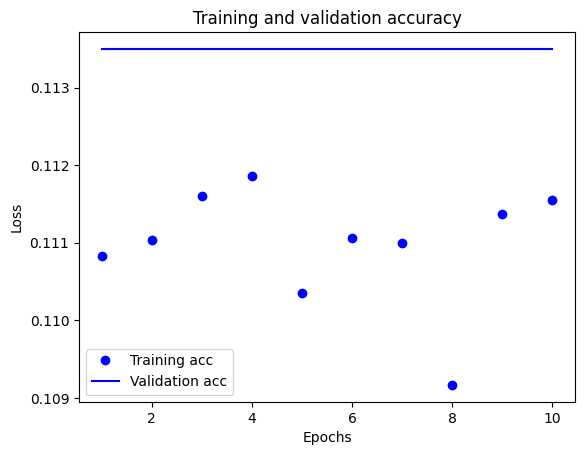

In [35]:
history_dict = history.history
plot_loss(history_dict)
plot_accuracy(history_dict)

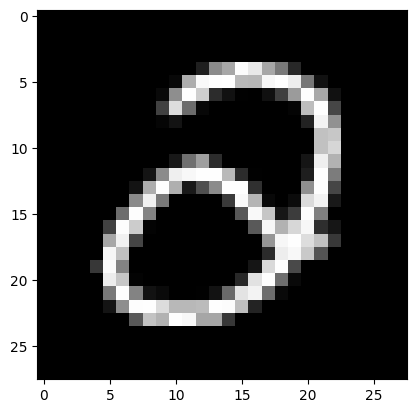

image.shape (1, 28, 28, 1)
1/1 [==============================] - 0s 20ms/step
pred_probs: (1, 10)
pred_probs: [0.09519304 0.1139355  0.10321052 0.10217651 0.09816103 0.09068051
 0.09674644 0.1091676  0.0937539  0.09697501]
Prediction: 1


In [36]:
# prediction workflow
# This gets a random image from the test set and displays it.
# Notice that we want the image to come from the test set, containing data the model didn't see during training
image = random.choice(x_test)

# show the image
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

# Need to reshape and normalize the image as we did before with the entire train set
# pre-process image / build a batch of one image to predict
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0
print('image.shape', image.shape)

# predict
pred_probs = model.predict(image)
# print out probs of the batch
print('pred_probs:', pred_probs.shape)
print('pred_probs:', pred_probs[0])

# predict the value of the image.

# The result is a one-hot-encoded vector.
# Nedd to take the argmax value (the position with the highest probability) to get the result.
# get index/class of max prob
pred = np.argmax(pred_probs, axis=1)
print("Prediction:", pred[0])